# Importação das bibliotecas básicas

In [32]:
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

## Treinamento

In [16]:
import zipfile

In [45]:
path = '/content/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [46]:
import os

In [68]:
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for caminho in caminhos:
    imagem = Image.open(caminho).convert('L')
    imagem_np = np.array(imagem,'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [69]:
ids, faces = dados_imagem()

In [70]:
faces[0]

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 201, 193, 196],
       [255, 255, 255, ..., 217, 209, 218],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [71]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

## Classificação

In [72]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/classificadorLBPH.yml')


In [78]:
imagem_teste = '/content/yalefaces/test/subject11.happy.gif'

In [79]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 182 175 158]
 [246 246 245 ... 168 173 179]
 [ 68  68  68 ...  68  68  68]]


In [80]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto

11

In [81]:
idcorreto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
idcorreto

11

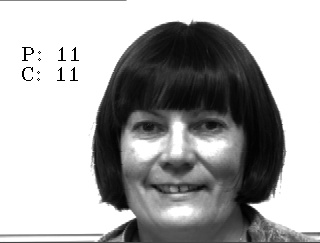

In [82]:
cv2.putText(imagem_np, 'P: ' + str(idprevisto), (20, 60), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'C: ' + str(idcorreto), (20, 80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)